# Covariance and Correlation

Do instruments/assets move together (if so, to what extend?)

Three cases:
- unrelated (no relationship/correlation)
- moving together (positive relationship/correlation)
- move in opposite directions (negative relationship/correlation)

**Correlation between instruments/assets plays an important role in portfolio management.**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn-v0_8")

In [8]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492


In [9]:
close["USDEUR=X"] = 1/close["EURUSD=X"]
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
Date,,,,,,,
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109,0.7919
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508,0.7921
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895,0.7892
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508,0.8164
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406,0.8202
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492,0.8201


In [10]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
Date,,,,,,,
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-02,-0.0040,-0.0225,-0.0003,-0.0003,-0.0031,-0.0002,0.0003
2014-10-03,0.0175,-0.0424,0.0037,-0.0183,0.0072,0.0123,-0.0037
2014-10-04,NaN,-0.0891,NaN,NaN,NaN,NaN,NaN
2014-10-05,NaN,-0.0257,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-05-26,0.0026,0.0230,0.0028,0.0017,-0.0009,0.0003,-0.0028
2021-05-27,0.0379,-0.0221,-0.0046,-0.0029,-0.0087,0.0041,0.0046
2021-05-28,-0.0148,-0.0739,0.0000,0.0036,0.0015,0.0019,-0.0000


In [11]:
returns.cov() # covariance (hard to interpret)

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
BA,0.0007,0.0001,0.0000,0.0000,0.0002,0.0002,-0.0000
BTC-USD,0.0001,0.0016,-0.0000,0.0000,0.0001,0.0001,0.0000
EURUSD=X,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000
GC=F,0.0000,0.0000,0.0000,0.0001,-0.0000,-0.0000,-0.0000
MSFT,0.0002,0.0001,-0.0000,-0.0000,0.0003,0.0002,0.0000
^DJI,0.0002,0.0001,0.0000,-0.0000,0.0002,0.0001,-0.0000
USDEUR=X,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000


In [12]:
returns.corr() # correlation coefficient (easy to interpret)

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
BA,1.0000,0.1323,0.0347,0.0048,0.4221,0.7253,-0.0347
BTC-USD,0.1323,1.0000,-0.0163,0.0986,0.1450,0.1604,0.0163
EURUSD=X,0.0347,-0.0163,1.0000,0.0565,-0.0191,0.0295,-1.0000
GC=F,0.0048,0.0986,0.0565,1.0000,-0.0008,-0.0121,-0.0565
MSFT,0.4221,0.1450,-0.0191,-0.0008,1.0000,0.7422,0.0191
^DJI,0.7253,0.1604,0.0295,-0.0121,0.7422,1.0000,-0.0295
USDEUR=X,-0.0347,0.0163,-1.0000,-0.0565,0.0191,-0.0295,1.0000


Three cases:
- no correlation: coefficient == 0
- moving together: 0 < correlation coefficient <= 1 (positive)
- moving in opposite directions -1 <= correlation coefficient < 0 (negative)

In [15]:
import seaborn as sns

<Axes: >

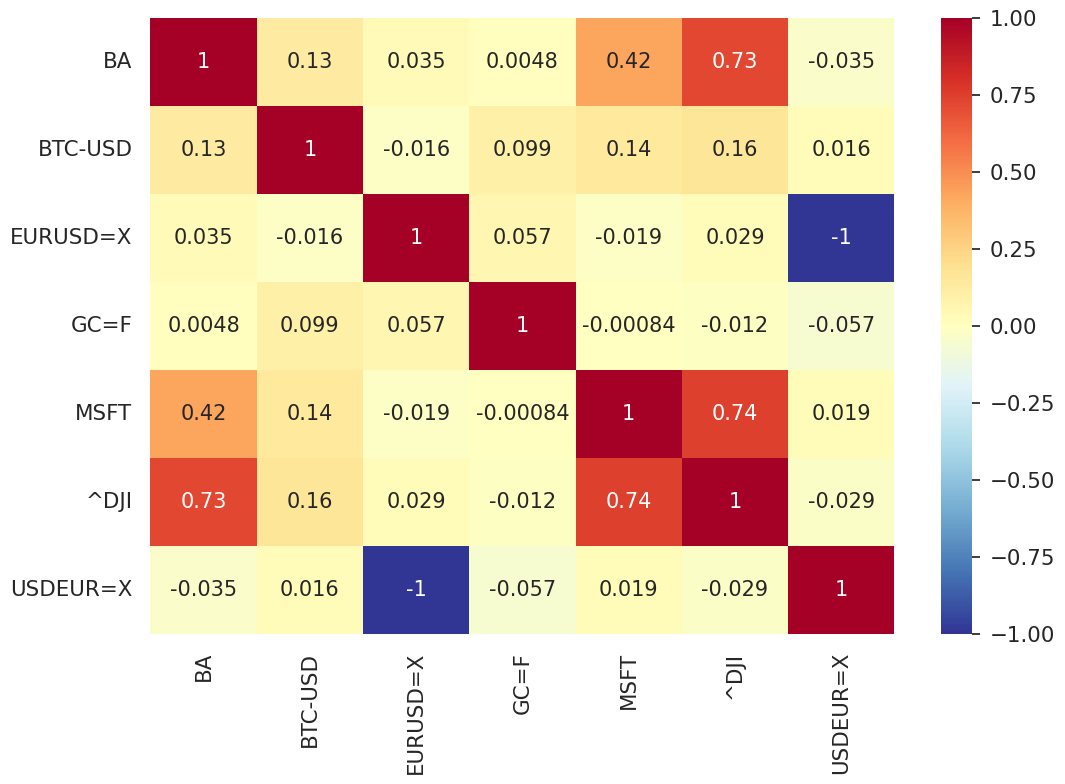

In [17]:
plt.figure(figsize = (12, 8))
sns.set(font_scale = 1.4)
sns.heatmap(returns.corr(), cmap = "RdYlBu_r", annot = True, annot_kws = {"size": 15}, vmin = -1, vmax = 1)

**Take home: similar assets are (highly) positive correlated. Different assets exhibit low/no/negative correlation.**
In portfolio management it's beneficial to have assets with low/no/negative correlation (portfolio diversification).